In [1]:
import pandas as pd

# Load the dataset for training data
file_path = "/Users/School/DataMining/Assignment_1/CensusIncomeDataSet/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]
train_data = pd.read_csv(file_path, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Drop rows with missing values
train_data.dropna(inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)

# Load the dataset for test data
test_file_path = "/Users/School/DataMining/Assignment_1/CensusIncomeDataSet/adult.test"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
                "hours-per-week", "native-country", "income"]
test_data = pd.read_csv(test_file_path, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Remove the period from the income column in both datasets
test_data['income'] = test_data['income'].str.replace('.', '', regex=False)

# Drop rows with missing values
test_data.dropna(inplace=True)

# Encode categorical variables
test_data = pd.get_dummies(test_data, drop_first=True)

# Ensure the test dataset has the same columns as the training dataset
# Identify missing columns in the test data
missing_cols = set(train_data.columns) - set(test_data.columns)
print(missing_cols)

# Add missing columns to the test data with default values as "False"- as the only columns identifed above is a binary column)
for col in missing_cols:
    test_data[col] = False

# Ensure the columns are in the same order
test_data = test_data[train_data.columns]

# Define features and target for training data
X = train_data.drop("income_>50K", axis=1)
y = train_data["income_>50K"]

# Define features and target for test data
X_test = test_data.drop("income_>50K", axis=1)
y_test = test_data["income_>50K"]

# Display the first few rows of the dataset for training data
print(X.head())
# Check the number of rows same as the given data set 32561
num_of_rows = X.shape[0]
print(f"The number of rows is {num_of_rows}")

# Display the first few rows of the dataset for testing data
print(X_test.head())
# Check the number of rows same as the given data set 16281
num_of_rows = X_test.shape[0]
print(f"The number of rows is {num_of_rows}")

{'native-country_Holand-Netherlands'}
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Portugal  \
0     

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Initialize the model - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyper-parameter tuning for Decision Tree
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Train Decision Tree model and record the time
start_time = time.time()
grid_search_dt.fit(X, y)
dt_train_time = time.time() - start_time
dt_best_model = grid_search_dt.best_estimator_

print(dt_train_time, dt_best_model)

29.609824657440186 DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)


Decision Tree Confusion Matrix:
 [[11729   706]
 [ 1556  2290]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91     12435
        True       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

Decision Tree ROC-AUC:  0.9029460527033869


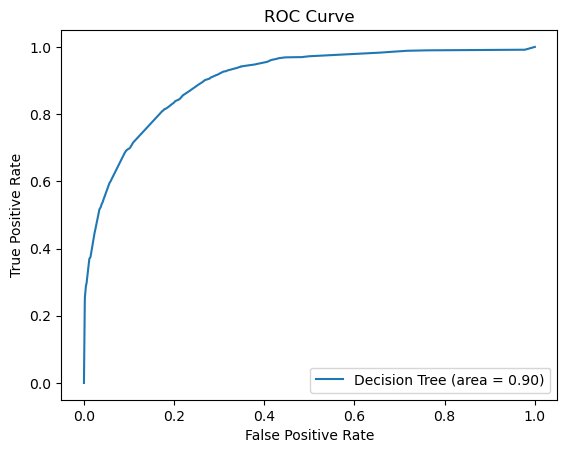

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions and timing for Decision Tree
start_time = time.time()
dt_pred = dt_best_model.predict(X_test)
dt_pred_time = time.time() - start_time

# Confusion Matrix
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

# Classification Report
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# ROC-AUC
dt_prob = dt_best_model.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_prob)
print("Decision Tree ROC-AUC: ", dt_auc)

# Plot ROC Curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

# Initialize the models for Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyper-parameter tuning for Random Forest
param_grid_rf = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Train the Random Forest model
start_time = time.time()
grid_search_rf.fit(X, y)
rf_train_time = time.time() - start_time
rf_best_model = grid_search_rf.best_estimator_

print(rf_train_time, rf_best_model)

306.78033804893494 RandomForestClassifier(max_depth=30, min_samples_split=20, random_state=42)


Random Forest Classifier Matrix:
 [[11745   690]
 [ 1530  2316]]
Random Forest Classifier Report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91     12435
        True       0.77      0.60      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281

Random Forest Classifier ROC-AUC:  0.9161027357861504


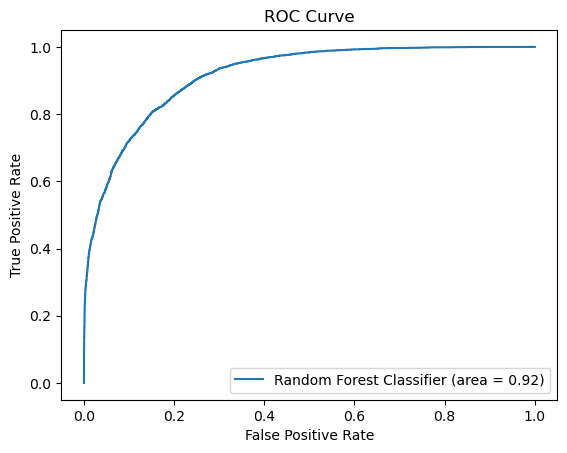

In [8]:
# Predictions and timing for Random Forest
start_time = time.time()
rf_pred = rf_best_model.predict(X_test)
rf_pred_time = time.time() - start_time

# Confusion Matrix
print("Random Forest Classifier Matrix:\n", confusion_matrix(y_test, rf_pred))

# Classification Report
print("Random Forest Classifier Report:\n", classification_report(y_test, rf_pred))

# ROC-AUC
rf_prob = rf_best_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_prob)

print("Random Forest Classifier ROC-AUC: ", rf_auc)

# Plot ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
#print the prediction timing for both classifiers
print(dt_pred_time)
print(rf_pred_time)

0.015644311904907227
0.644493818283081
